<a href="https://colab.research.google.com/github/Sreejith-nair511/Summer_course_Ai/blob/main/custom_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔁 Training model...
Epoch [10/100], Loss: 42.3214
Epoch [20/100], Loss: 42.0968
Epoch [30/100], Loss: 41.8644
Epoch [40/100], Loss: 41.6027
Epoch [50/100], Loss: 41.2899
Epoch [60/100], Loss: 40.8973
Epoch [70/100], Loss: 40.3772
Epoch [80/100], Loss: 39.6480
Epoch [90/100], Loss: 38.5806
Epoch [100/100], Loss: 37.0122


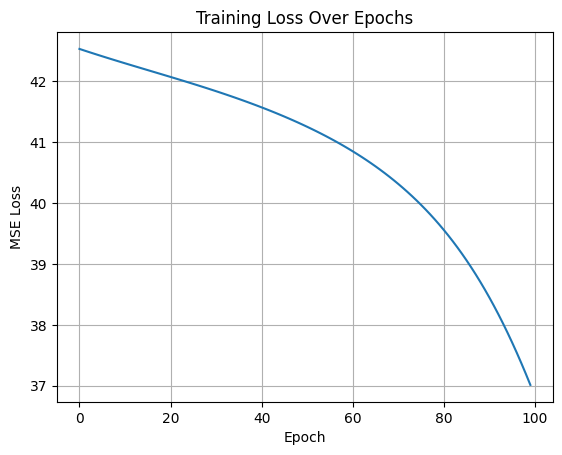


📊 Evaluating on test set...
Test Loss: 37.7860

🎯 Example Prediction:
Predicted: -1.1590
Actual Target: -2.7911


In [ ]:
# ✅ RNN Regression from Scratch with FC Output Layer (Google Colab Ready)

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# Step 1: Custom RNN Cell with Bias Embedded in Weight Matrix
# -----------------------------------------------------------
class SimpleRNNCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleRNNCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Combined weight: input + hidden + bias row
        self.combined_weights = nn.Parameter(
            torch.Tensor(input_size + hidden_size + 1, hidden_size)
        )
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1.0 / torch.sqrt(torch.tensor(self.hidden_size, dtype=torch.float32))
        self.combined_weights.data.uniform_(-stdv, stdv)

    def forward(self, input, hidden):
        batch_size = input.size(0)
        bias_term = torch.ones(batch_size, 1, device=input.device)
        combined_input = torch.cat((input, hidden, bias_term), dim=1)
        next_hidden = torch.tanh(torch.matmul(combined_input, self.combined_weights))
        return next_hidden, next_hidden

# -----------------------------------------------------------
# Step 2: Simple RNN Model with Output Layer (FC)
# -----------------------------------------------------------
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(SimpleRNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        if num_layers != 1:
            raise NotImplementedError("Only num_layers=1 supported")

        self.rnn_cell = SimpleRNNCell(input_size, hidden_size)

        # 🔥 Output layer: maps hidden state to single regression value
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, input_seq):
        seq_len, batch_size, _ = input_seq.size()
        hidden = torch.zeros(batch_size, self.hidden_size, device=input_seq.device)

        for t in range(seq_len):
            input_t = input_seq[t, :, :]
            hidden, _ = self.rnn_cell(input_t, hidden)

        output = self.fc(hidden)  # Final prediction
        return output

# -----------------------------------------------------------
# Step 3: Synthetic Dataset Generator
# -----------------------------------------------------------
def create_sequence_data(num_sequences, seq_len, input_size):
    sequences = torch.randn(num_sequences, seq_len, input_size)
    targets = torch.sum(sequences[:, :seq_len-1, :], dim=(1, 2))
    targets += 0.1 * torch.randn(num_sequences)
    return sequences, targets.unsqueeze(1)  # Shape: (batch, 1)

# -----------------------------------------------------------
# Step 4: Model Setup, Training
# -----------------------------------------------------------
input_size = 5
hidden_size = 10
seq_len = 10
num_sequences = 1000
learning_rate = 0.001
epochs = 100

# Create data
all_sequences, all_targets = create_sequence_data(num_sequences, seq_len, input_size)

# Normalize input data (optional but helpful)
mean = all_sequences.mean()
std = all_sequences.std()
all_sequences = (all_sequences - mean) / std

# Train-test split
train_size = int(0.8 * num_sequences)
train_sequences, train_targets = all_sequences[:train_size], all_targets[:train_size]
test_sequences, test_targets = all_sequences[train_size:], all_targets[train_size:]

# Transpose input shape to (seq_len, batch_size, input_size)
train_sequences = train_sequences.transpose(0, 1)
test_sequences = test_sequences.transpose(0, 1)

# Model, loss, optimizer
model = SimpleRNN(input_size, hidden_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# -----------------------------------------------------------
# Step 5: Training Loop
# -----------------------------------------------------------
loss_values = []
print("🔁 Training model...")
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(train_sequences)
    loss = criterion(outputs, train_targets)

    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()

    loss_values.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# -----------------------------------------------------------
# Step 6: Plot Loss
# -----------------------------------------------------------
plt.plot(loss_values)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

# -----------------------------------------------------------
# Step 7: Test Evaluation
# -----------------------------------------------------------
print("\n📊 Evaluating on test set...")
model.eval()
with torch.no_grad():
    test_outputs = model(test_sequences)
    test_loss = criterion(test_outputs, test_targets)
    print(f"Test Loss: {test_loss.item():.4f}")

# -----------------------------------------------------------
# Step 8: Single Sequence Prediction Example
# -----------------------------------------------------------
single_test_sequence = test_sequences[:, 0:1, :]
single_test_target = test_targets[0]

with torch.no_grad():
    single_output = model(single_test_sequence)

print("\n🎯 Example Prediction:")
print(f"Predicted: {single_output.item():.4f}")
print(f"Actual Target: {single_test_target.item():.4f}")


🔁 Training...
Epoch [  10/1000], Loss: 0.9606
Epoch [  20/1000], Loss: 0.9046
Epoch [  30/1000], Loss: 0.8363
Epoch [  40/1000], Loss: 0.6283
Epoch [  50/1000], Loss: 0.1958
Epoch [  60/1000], Loss: 0.0927
Epoch [  70/1000], Loss: 0.0869
Epoch [  80/1000], Loss: 0.0703
Epoch [  90/1000], Loss: 0.0564
Epoch [ 100/1000], Loss: 0.0456
Epoch [ 110/1000], Loss: 0.0414
Epoch [ 120/1000], Loss: 0.0381
Epoch [ 130/1000], Loss: 0.0352
Epoch [ 140/1000], Loss: 0.0327
Epoch [ 150/1000], Loss: 0.0305
Epoch [ 160/1000], Loss: 0.0286
Epoch [ 170/1000], Loss: 0.0269
Epoch [ 180/1000], Loss: 0.0254
Epoch [ 190/1000], Loss: 0.0240
Epoch [ 200/1000], Loss: 0.0228
Epoch [ 210/1000], Loss: 0.0222
Epoch [ 220/1000], Loss: 0.0216
Epoch [ 230/1000], Loss: 0.0211
Epoch [ 240/1000], Loss: 0.0206
Epoch [ 250/1000], Loss: 0.0201
Epoch [ 260/1000], Loss: 0.0197
Epoch [ 270/1000], Loss: 0.0192
Epoch [ 280/1000], Loss: 0.0188
Epoch [ 290/1000], Loss: 0.0183
Epoch [ 300/1000], Loss: 0.0179
Epoch [ 310/1000], Loss: 0

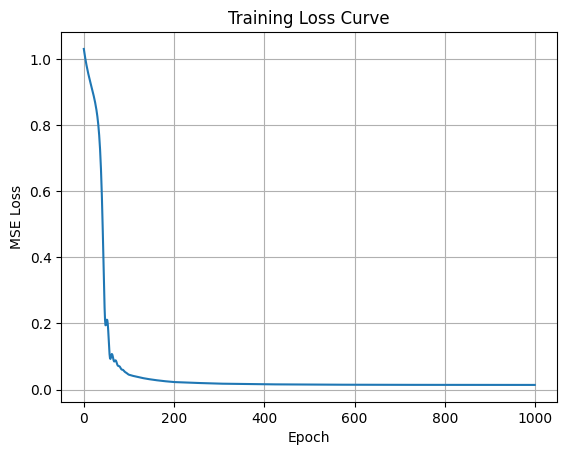


📊 Test Loss: 0.0215

🎯 Example Prediction (Denormalized):
Predicted: 9.94
Actual:    10.50


In [ ]:


import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# -----------------------------
# Custom RNN Cell
# -----------------------------
class SimpleRNNCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleRNNCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.combined_weights = nn.Parameter(
            torch.Tensor(input_size + hidden_size + 1, hidden_size)
        )
        self.reset_parameters()
        #You're creating your own RNN cell by extending PyTorch's base class nn.Module.

#input_size = how many features each input step has.

#hidden_size = how many neurons are in the hidden layer (memory).



    def reset_parameters(self):
        stdv = 1.0 / torch.sqrt(torch.tensor(self.hidden_size, dtype=torch.float32))
        self.combined_weights.data.uniform_(-stdv, stdv)

    def forward(self, input, hidden):
        batch_size = input.size(0)
        bias_term = torch.ones(batch_size, 1, device=input.device)
        combined_input = torch.cat((input, hidden, bias_term), dim=1)
        next_hidden = torch.tanh(torch.matmul(combined_input, self.combined_weights))
        return next_hidden, next_hidden

# -----------------------------
# RNN Model with Output Layer
# -----------------------------
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleRNN, self).__init__()
        self.rnn_cell = SimpleRNNCell(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, input_seq):
        seq_len, batch_size, _ = input_seq.size()
        hidden = torch.zeros(batch_size, self.rnn_cell.hidden_size, device=input_seq.device)

        for t in range(seq_len):
            input_t = input_seq[t, :, :]
            hidden, _ = self.rnn_cell(input_t, hidden)

        return self.fc(hidden)

# -----------------------------
# Synthetic Dataset Generator
# -----------------------------
def create_sequence_data(num_sequences, seq_len, input_size):
    sequences = torch.randn(num_sequences, seq_len, input_size)
    targets = torch.sum(sequences[:, :seq_len-1, :], dim=(1, 2))
    targets += 0.1 * torch.randn(num_sequences)
    return sequences, targets.unsqueeze(1)

# -----------------------------
# Training Parameters
# -----------------------------
input_size = 5
hidden_size = 32
seq_len = 10
num_sequences = 1000
learning_rate = 0.001
epochs = 1000
target_loss_threshold = 0.01

# -----------------------------
# Create and Normalize Data
# -----------------------------
all_sequences, all_targets = create_sequence_data(num_sequences, seq_len, input_size)

seq_mean, seq_std = all_sequences.mean(), all_sequences.std()
target_mean, target_std = all_targets.mean(), all_targets.std()

all_sequences = (all_sequences - seq_mean) / seq_std
all_targets = (all_targets - target_mean) / target_std

# Train-test split
train_size = int(0.8 * num_sequences)
train_seq, test_seq = all_sequences[:train_size], all_sequences[train_size:]
train_tgt, test_tgt = all_targets[:train_size], all_targets[train_size:]

train_seq = train_seq.transpose(0, 1)  # (seq_len, batch, input_size)
test_seq = test_seq.transpose(0, 1)

# -----------------------------
# Model, Optimizer, Scheduler
# -----------------------------
model = SimpleRNN(input_size, hidden_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

# -----------------------------
# Training Loop
# -----------------------------
loss_values = []
print("🔁 Training...")

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    output = model(train_seq)
    loss = criterion(output, train_tgt)
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()

    loss_values.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1:>4}/{epochs}], Loss: {loss.item():.4f}")

    if loss.item() < target_loss_threshold:
        print(f"\n✅ Early stopping at epoch {epoch+1} with loss = {loss.item():.4f}")
        break

# -----------------------------
# Plot Training Loss
# -----------------------------
plt.plot(loss_values)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

# -----------------------------
# Evaluate on Test Set
# -----------------------------
model.eval()
with torch.no_grad():
    test_output = model(test_seq)
    test_loss = criterion(test_output, test_tgt)
    print(f"\n📊 Test Loss: {test_loss.item():.4f}")

# -----------------------------
# Example Prediction
# -----------------------------
example_seq = test_seq[:, 0:1, :]
actual_target = test_tgt[0]

with torch.no_grad():
    pred = model(example_seq)

# Denormalize output
pred_val = pred * target_std + target_mean
actual_val = actual_target * target_std + target_mean

print("\n🎯 Example Prediction (Denormalized):")
print(f"Predicted: {pred_val.item():.2f}")
print(f"Actual:    {actual_val.item():.2f}")


🔁 Enhanced Training...
Epoch [  50/2000], Train Loss: 0.089509, Val Loss: 0.045088
Epoch [ 100/2000], Train Loss: 0.070135, Val Loss: 0.036492
Epoch [ 150/2000], Train Loss: 0.062725, Val Loss: 0.036151
Epoch [ 200/2000], Train Loss: 0.060515, Val Loss: 0.036479
Epoch [ 250/2000], Train Loss: 0.060134, Val Loss: 0.028214
Epoch [ 300/2000], Train Loss: 0.049553, Val Loss: 0.027189
Epoch [ 350/2000], Train Loss: 0.053684, Val Loss: 0.027012
Epoch [ 400/2000], Train Loss: 0.051165, Val Loss: 0.027890
Epoch [ 450/2000], Train Loss: 0.051825, Val Loss: 0.026426
Epoch [ 500/2000], Train Loss: 0.048474, Val Loss: 0.031717
Epoch [ 550/2000], Train Loss: 0.050270, Val Loss: 0.022367
Epoch [ 600/2000], Train Loss: 0.041436, Val Loss: 0.024725
Epoch [ 650/2000], Train Loss: 0.044887, Val Loss: 0.023132
Epoch [ 700/2000], Train Loss: 0.043686, Val Loss: 0.024952
Epoch [ 750/2000], Train Loss: 0.043208, Val Loss: 0.020485
Epoch [ 800/2000], Train Loss: 0.045471, Val Loss: 0.025150

⏹️  Early stoppi

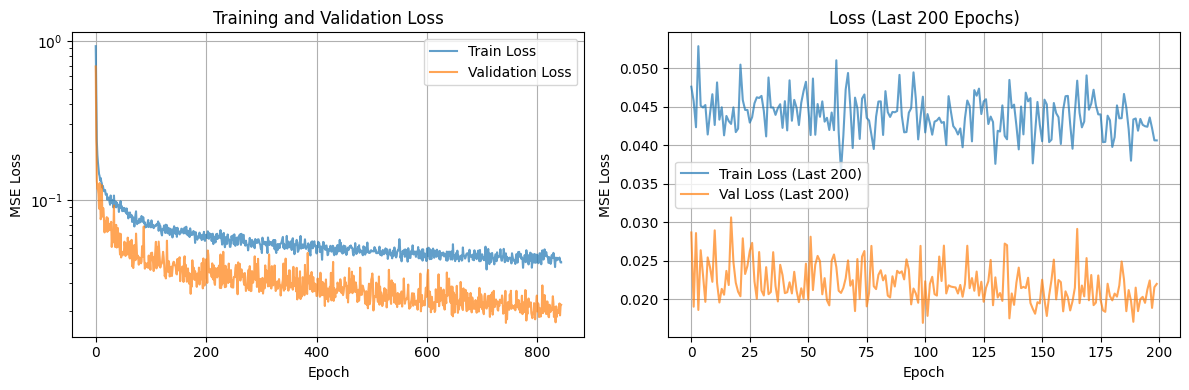


📊 Final Test Loss: 0.018295

🎯 Example Predictions (Denormalized):
----------------------------------------
Sample 1: Pred=8.5592, Actual=11.4460, Error=2.8868
Sample 2: Pred=-20.4253, Actual=-18.5352, Error=1.8901
Sample 3: Pred=6.5330, Actual=7.3078, Error=0.7748
Sample 4: Pred=-6.3914, Actual=-5.0317, Error=1.3597
Sample 5: Pred=-4.7755, Actual=-5.1918, Error=0.4163

📈 R² Score: 0.983104
💡 Model explains 98.31% of the variance


In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Enhanced RNN Cell with Improvements
# -----------------------------
class EnhancedRNNCell(nn.Module):
    def __init__(self, input_size, hidden_size, dropout=0.1):
        super(EnhancedRNNCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Separate weight matrices for better gradient flow
        self.W_ih = nn.Parameter(torch.Tensor(input_size, hidden_size))
        self.W_hh = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.bias = nn.Parameter(torch.Tensor(hidden_size))

        self.dropout = nn.Dropout(dropout)
        self.layer_norm = nn.LayerNorm(hidden_size)

        self.reset_parameters()

    def reset_parameters(self):
        # Xavier/Glorot initialization for better convergence
        nn.init.xavier_uniform_(self.W_ih)
        nn.init.orthogonal_(self.W_hh)  # Orthogonal init for recurrent weights
        nn.init.zeros_(self.bias)

    def forward(self, input, hidden):
        # More stable computation
        hidden_contribution = torch.matmul(hidden, self.W_hh)
        input_contribution = torch.matmul(input, self.W_ih)

        # Apply layer normalization before activation
        pre_activation = self.layer_norm(hidden_contribution + input_contribution + self.bias)
        next_hidden = torch.tanh(pre_activation)

        # Apply dropout during training
        next_hidden = self.dropout(next_hidden)

        return next_hidden, next_hidden

# -----------------------------
# Enhanced RNN Model with Residual Connections
# -----------------------------
class EnhancedRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=2, dropout=0.1):
        super(EnhancedRNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size

        # Multiple RNN layers
        self.rnn_layers = nn.ModuleList()
        for i in range(num_layers):
            layer_input_size = input_size if i == 0 else hidden_size
            self.rnn_layers.append(EnhancedRNNCell(layer_input_size, hidden_size, dropout))

        # Output layers with residual connection
        self.fc1 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc2 = nn.Linear(hidden_size // 2, hidden_size // 4)
        self.fc3 = nn.Linear(hidden_size // 4, 1)

        self.dropout = nn.Dropout(dropout)
        self.layer_norm = nn.LayerNorm(hidden_size)

    def forward(self, input_seq):
        seq_len, batch_size, _ = input_seq.size()

        # Initialize hidden states for all layers
        hidden_states = [torch.zeros(batch_size, self.hidden_size, device=input_seq.device)
                        for _ in range(self.num_layers)]

        # Process sequence
        for t in range(seq_len):
            input_t = input_seq[t, :, :]

            # Pass through all RNN layers
            for layer_idx, rnn_layer in enumerate(self.rnn_layers):
                if layer_idx == 0:
                    layer_input = input_t
                else:
                    layer_input = hidden_states[layer_idx - 1]

                hidden_states[layer_idx], _ = rnn_layer(layer_input, hidden_states[layer_idx])

        # Use final hidden state from last layer
        final_hidden = hidden_states[-1]

        # Multi-layer output with residual connections
        x = torch.relu(self.fc1(final_hidden))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        output = self.fc3(x)

        return output

# -----------------------------
# Enhanced Dataset Generator with Better Target Function
# -----------------------------
def create_enhanced_sequence_data(num_sequences, seq_len, input_size):
    sequences = torch.randn(num_sequences, seq_len, input_size)

    # More complex target function that's still learnable
    # Use weighted sum with different weights for different time steps
    time_weights = torch.linspace(0.5, 1.5, seq_len-1).unsqueeze(0).unsqueeze(2)
    weighted_sequences = sequences[:, :seq_len-1, :] * time_weights

    targets = torch.sum(weighted_sequences, dim=(1, 2))

    # Add some non-linear transformation
    targets = targets + 0.1 * torch.sin(targets)

    # Add minimal noise
    targets += 0.05 * torch.randn(num_sequences)

    return sequences, targets.unsqueeze(1)

# -----------------------------
# Training Parameters (Optimized)
# -----------------------------
input_size = 5
hidden_size = 64  # Increased for better capacity
num_layers = 2
seq_len = 10
num_sequences = 2000  # More training data
learning_rate = 0.001
epochs = 2000
target_loss_threshold = 0.001  # More aggressive threshold
batch_size = 32  # Mini-batch training

# -----------------------------
# Create and Normalize Data
# -----------------------------
all_sequences, all_targets = create_enhanced_sequence_data(num_sequences, seq_len, input_size)

# Better normalization
seq_mean, seq_std = all_sequences.mean(), all_sequences.std()
target_mean, target_std = all_targets.mean(), all_targets.std()

all_sequences = (all_sequences - seq_mean) / (seq_std + 1e-8)
all_targets = (all_targets - target_mean) / (target_std + 1e-8)

# Train-validation-test split
train_size = int(0.7 * num_sequences)
val_size = int(0.15 * num_sequences)

train_seq = all_sequences[:train_size]
val_seq = all_sequences[train_size:train_size + val_size]
test_seq = all_sequences[train_size + val_size:]

train_tgt = all_targets[:train_size]
val_tgt = all_targets[train_size:train_size + val_size]
test_tgt = all_targets[train_size + val_size:]

# -----------------------------
# Model, Optimizer, Scheduler (Enhanced)
# -----------------------------
model = EnhancedRNN(input_size, hidden_size, num_layers, dropout=0.1)
criterion = nn.MSELoss()

# Use AdamW with weight decay
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)

# Cosine annealing scheduler for better convergence
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs, eta_min=1e-6)

# -----------------------------
# Enhanced Training Loop with Mini-batches
# -----------------------------
train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = 100
patience_counter = 0

print("🔁 Enhanced Training...")

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0

    # Mini-batch training
    for i in range(0, len(train_seq), batch_size):
        batch_seq = train_seq[i:i+batch_size].transpose(0, 1)
        batch_tgt = train_tgt[i:i+batch_size]

        optimizer.zero_grad()
        output = model(batch_seq)
        loss = criterion(output, batch_tgt)
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
        optimizer.step()

        epoch_train_loss += loss.item()

    # Validation
    model.eval()
    with torch.no_grad():
        val_output = model(val_seq.transpose(0, 1))
        val_loss = criterion(val_output, val_tgt)

    train_losses.append(epoch_train_loss / (len(train_seq) // batch_size))
    val_losses.append(val_loss.item())

    scheduler.step()

    # Early stopping
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        patience_counter = 0
        # Save best model
        best_model_state = model.state_dict().copy()
    else:
        patience_counter += 1

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1:>4}/{epochs}], Train Loss: {train_losses[-1]:.6f}, Val Loss: {val_loss.item():.6f}")

    if val_loss.item() < target_loss_threshold:
        print(f"\n✅ Early stopping at epoch {epoch+1} with val loss = {val_loss.item():.6f}")
        break

    if patience_counter >= patience:
        print(f"\n⏹️  Early stopping due to no improvement for {patience} epochs")
        break

# Load best model
model.load_state_dict(best_model_state)

# -----------------------------
# Enhanced Visualization
# -----------------------------
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', alpha=0.7)
plt.plot(val_losses, label='Validation Loss', alpha=0.7)
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(train_losses[-200:], label='Train Loss (Last 200)', alpha=0.7)
plt.plot(val_losses[-200:], label='Val Loss (Last 200)', alpha=0.7)
plt.title("Loss (Last 200 Epochs)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# -----------------------------
# Final Evaluation
# -----------------------------
model.eval()
with torch.no_grad():
    test_output = model(test_seq.transpose(0, 1))
    test_loss = criterion(test_output, test_tgt)
    print(f"\n📊 Final Test Loss: {test_loss.item():.6f}")

# -----------------------------
# Multiple Example Predictions
# -----------------------------
print("\n🎯 Example Predictions (Denormalized):")
print("-" * 40)

with torch.no_grad():
    for i in range(min(5, len(test_seq))):
        example_seq = test_seq[i:i+1].transpose(0, 1)
        actual_target = test_tgt[i]

        pred = model(example_seq)

        # Denormalize
        pred_val = pred * target_std + target_mean
        actual_val = actual_target * target_std + target_mean

        error = abs(pred_val.item() - actual_val.item())
        print(f"Sample {i+1}: Pred={pred_val.item():.4f}, Actual={actual_val.item():.4f}, Error={error:.4f}")

# Calculate R² score
with torch.no_grad():
    all_preds = model(test_seq.transpose(0, 1))
    # Denormalize for R² calculation
    all_preds_denorm = all_preds * target_std + target_mean
    all_targets_denorm = test_tgt * target_std + target_mean

    ss_res = torch.sum((all_targets_denorm - all_preds_denorm) ** 2)
    ss_tot = torch.sum((all_targets_denorm - torch.mean(all_targets_denorm)) ** 2)
    r2_score = 1 - (ss_res / ss_tot)

    print(f"\n📈 R² Score: {r2_score.item():.6f}")
    print(f"💡 Model explains {r2_score.item()*100:.2f}% of the variance")